## Guia da Camada Física
O documento tem o objetivo de demostrar o funcionamento da camda física,além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

Será instaciada a rede e definida a topologia de Grade

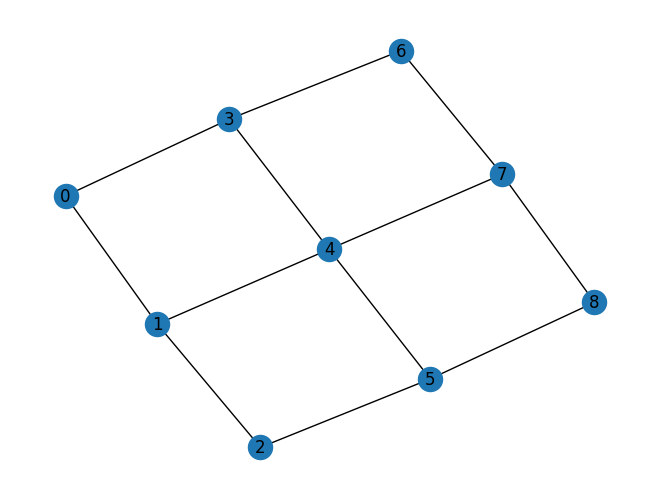

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

In [3]:
#Esse código basicamente seleciona aleatoriamente uma aresta do grafo da rede e imprime tanto todas as arestas quanto a aresta selecionada aleatoriamente.
arestas = list(rede.edges)
print(arestas)
aresta_aleatorias = random.sample(arestas, 1)[0]
print(aresta_aleatorias)

[(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 6), (3, 4), (4, 7), (4, 5), (5, 8), (6, 7), (7, 8)]
(7, 8)


In [4]:

#Deseguinando quem será Alice e Bob
x,y = aresta_aleatorias
alice = rede.get_host(x)
bob = rede.get_host(y)

h1 = Qubit(1)
h2 = Qubit(2)

#Adcionando qubits aos hosts
alice.add_qubit(h1)
bob.add_qubit(h2)



2024-06-02 23:11:01,560: Qubit 1 adicionado à memória do Host 7.
2024-06-02 23:11:01,561: Qubit 2 adicionado à memória do Host 8.


In [5]:
rede.start_hosts()
rede.start_channels()

2024-06-02 23:11:01,566: Qubit 0 adicionado à memória do Host 0.
2024-06-02 23:11:01,567: Qubit 0 criado com fidelidade inicial 1.0 e adicionado à memória do Host 0.
2024-06-02 23:11:01,567: Qubit 1 adicionado à memória do Host 0.
2024-06-02 23:11:01,568: Qubit 1 criado com fidelidade inicial 1.0 e adicionado à memória do Host 0.
2024-06-02 23:11:01,568: Qubit 2 adicionado à memória do Host 0.
2024-06-02 23:11:01,568: Qubit 2 criado com fidelidade inicial 1.0 e adicionado à memória do Host 0.
2024-06-02 23:11:01,568: Qubit 3 adicionado à memória do Host 1.
2024-06-02 23:11:01,569: Qubit 3 criado com fidelidade inicial 1.0 e adicionado à memória do Host 1.
2024-06-02 23:11:01,569: Qubit 4 adicionado à memória do Host 1.
2024-06-02 23:11:01,569: Qubit 4 criado com fidelidade inicial 1.0 e adicionado à memória do Host 1.
2024-06-02 23:11:01,570: Qubit 5 adicionado à memória do Host 1.
2024-06-02 23:11:01,570: Qubit 5 criado com fidelidade inicial 1.0 e adicionado à memória do Host 1.
2024

Hosts inicializados
Canais inicializados


In [6]:
#É possível acessar a memória dos dois hosts
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x000001ED81BD8E60>, <quantumnet.objects.qubit.Qubit object at 0x000001ED81C4CBF0>, <quantumnet.objects.qubit.Qubit object at 0x000001ED81C5D670>, <quantumnet.objects.qubit.Qubit object at 0x000001ED81C4D9A0>]
[<quantumnet.objects.qubit.Qubit object at 0x000001EDE947F6E0>, <quantumnet.objects.qubit.Qubit object at 0x000001ED81C4DCA0>, <quantumnet.objects.qubit.Qubit object at 0x000001ED81C257C0>, <quantumnet.objects.qubit.Qubit object at 0x000001ED81C4DA00>]


In [7]:
#Obtem-se o útimo qubit da memória de Alice
qub1 = alice.get_last_qubit()
print(alice.memory)
print(qub1)

[<quantumnet.objects.qubit.Qubit object at 0x000001ED81BD8E60>, <quantumnet.objects.qubit.Qubit object at 0x000001ED81C4CBF0>, <quantumnet.objects.qubit.Qubit object at 0x000001ED81C5D670>]
Qubit 23 with state None


In [8]:
#Aqui é criando o par EPR e retorna a fidelidade de Alice e Bob
rede.physical.create_epr_pair(h1,h2)

2024-06-02 23:11:01,645: A fidelidade do qubit Qubit 1 with state None é 1.0
2024-06-02 23:11:01,646: A fidelidade do qubit Qubit 2 with state None é 1.0


In [9]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-06-02 23:11:01,654: A fidelidade entre o qubit Qubit 1 with state None e o qubit Qubit 2 with state None é 1.0


1.0

In [10]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-06-02 23:11:01,660: A fidelidade do qubit Qubit 1 with state None é 1.0


1.0

### É possível a criação de ECHP entre dois qubits de Alice e Bob

In [11]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-06-02 23:11:01,668: A fidelidade do qubit Qubit 22 with state None é 1.0
2024-06-02 23:11:01,669: A fidelidade do qubit Qubit 26 with state None é 1.0
2024-06-02 23:11:01,669: A fidelidade entre o qubit Qubit 22 with state None e o qubit Qubit 26 with state None é 1.0
2024-06-02 23:11:01,669: O protocolo de criação de emaranhamento foi bem sucedido.


True

In [12]:
#Obtem-se o útimo qubit da memória de Alice
qub1 = alice.get_last_qubit()
print(alice.memory)
print(qub1)

Qubit 21 with state None


In [13]:
#Obtem-se o útimo qubit da memória de Bob
qub2 = bob.get_last_qubit()
print(qub2)

Qubit 25 with state None


### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP.

In [14]:
rede.physical.echp_on_demand(2,5)

2024-06-02 23:11:01,691: A fidelidade do qubit Qubit 8 with state None é 1.0
2024-06-02 23:11:01,692: A fidelidade do qubit Qubit 17 with state None é 1.0
2024-06-02 23:11:01,692: A fidelidade do qubit Qubit 8 with state None é 1.0
2024-06-02 23:11:01,693: A fidelidade do qubit Qubit 17 with state None é 1.0
2024-06-02 23:11:01,693: A probabilidade de sucesso do ECHP é 0.345073980866032


True

### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP.

In [15]:
rede.physical.echp_on_replay(2,5)

2024-06-02 23:11:01,701: A fidelidade do qubit Qubit 7 with state None é 1.0
2024-06-02 23:11:01,702: A fidelidade do qubit Qubit 16 with state None é 1.0
2024-06-02 23:11:01,702: A probabilidade de sucesso do ECHP falhou.


False

In [16]:
#Pode-se acessar o canal que mostrar as pprobablidades e os pares eprs.
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.345073980866032,
 'prob_replay_epr_create': 0.5865908943178291,
 'eprs': [<quantumnet.objects.epr.Epr at 0x1ede8fa4950>]}

In [17]:
#Além de poder acessar o dicionario que contém os pares eprs alocados.
rede.get_eprs()

{(0, 3): [],
 (0, 1): [],
 (1, 4): [],
 (1, 2): [],
 (2, 5): [<quantumnet.objects.epr.Epr at 0x1ede8fa4950>],
 (3, 6): [],
 (3, 4): [],
 (4, 7): [],
 (4, 5): [],
 (5, 8): [],
 (6, 7): [],
 (7, 8): []}